# Assignment

- Apply Linear regression with gradient descent and MSE loss function from scratch (don't use the built-in linear regression in any library) to the following data (X, Y)

- Split your dataset into 2 sets. Use 80% of your data for the training of the model and 20% of the data for the testing of the model (used to get the accuracy)




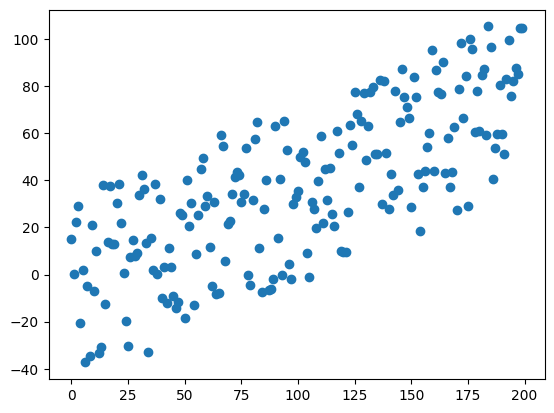

In [127]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(200)
delta = np.random.uniform(-50,30, size=(200,))

y = .4 * x +3 + delta

plt.scatter(x, y)
plt.show()

Mean Squared Error Function

In [128]:
def MSE(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

Gradient Descent

In [129]:
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    n = len(x)
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculating the current cost
        current_cost = MSE(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
     
    return current_weight, current_bias

Spliting the data

In [130]:
x_train = x[0:160]
x_test = x[160:200]
y_train = y[0:160]
y_test = y[160:200]

Get prediction values to test part 

In [131]:
current_weight, current_bias = gradient_descent(x_train,y_train)
y_hat = (current_weight*x_test)+current_bias

Calculate the Error & Accuracy

In [142]:
Error = MSE(y_test , y_hat)
print("Mean squared error =",Error)
print('-'*50)

import sklearn.metrics as sm
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_hat), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_hat), 2))

Mean squared error = 480.82623560676046
--------------------------------------------------
Explain variance score = 0.1
R2 score = -0.02
